In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] ='/content'

In [ ]:
!kaggle datasets download -d johnsmith88/heart-disease-dataset
kaggle datasets download -d johnsmith88/heart-disease-dataset

  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 12.6MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  heart-disease-dataset.zip
  inflating: heart.csv               


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/heart.csv')
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
         'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [ ]:
# Perform exploratory data analysis
print(data.head())
print(data.info())
print(data.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [ ]:
# Handle missing values
data = data.replace('?', np.nan)
data = data.dropna()


In [ ]:
# Convert categorical variables to numeric
data['target'] = data['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})


In [ ]:
# Selecting features for analysis
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
            'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [ ]:
X = data[features]
y = data['target']


In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predictions
y_pred = knn.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Accuracy Score: 0.8341463414634146
Precision Score: 0.8
Recall Score: 0.8932038834951457
F1 Score: 0.8440366972477065


In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



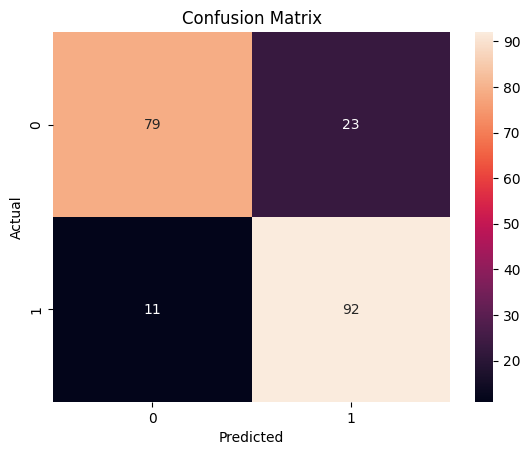

In [ ]:
# Confusion Matrix
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.show()
